In [1]:
#Imports
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
#from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting
from pypfopt.risk_models import risk_matrix
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import scipy.optimize as sco
from pypfopt import risk_models
#from pypfopt.efficient_frontier import EfficientFrontier
#ef = EfficientFrontier(mu, S)
#weights = ef.max_sharpe()

(CVXPY) Aug 20 01:59:02 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <825F20AD-4E2F-31FC-9288-650E1DDAA389> /Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so\n  Reason: tried: '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")
(CVXPY) Aug 20 01:59:02 AM: Encountered unexpected exception impor

In [2]:
stock_symbols = [ "AAPL", "MSFT", "GOOG", "META", "AMZN","NDX"] # Change this to the desired stock symbol
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days
portfolio_data= yf.download(stock_symbols, start=start_date, end=end_date)
#Drop Nulls. Remove high, low, open data. 
print(portfolio_data.isnull().sum())
portfolio_data = portfolio_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
portfolio_data.dropna()

[*********************100%%**********************]  6 of 6 completed
Adj Close  AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Close      AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
High       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Low        AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Open       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Volume     AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
dtype: int64


Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2013-08-22   15.677097   14.486500   21.761185   38.549999   27.123857   
2013-08-23   15.616632   14.500500   21.674009   40.549999   29.100159   
2013-08-26   15.677418   14.310500   21.578867   41.340000   28.597715   
2013-08-27   15.229193   14.046500   21.174383   39.639999   27.852413   
2013-08-28   15.301193   14.079000   21.134533   40.549999   27.651430   
...                ...         ...         ...         ...         ...   
2023-08-14  179.460007  140.570007  131.830002  306.190002  323.355408   
2023-08-15  177.449997  137.669998  130.270004  301.950012  321.179962   
2023-08-16  176.570007  135.070007  129.110001  294.290009  320.399994   
2023-08-17  174.000000  133.979996  130.460007  285.089996  316.880005   
2023-08-18  174.490005  133.220001  128.110001  283.250000  316.480011   

                          
                     NDX  
Date                      
2013-08-22   3101.820068  
2013-08-23   3124.270020  
2013-08-26   3122.669922  
2013-08-27   3059.580078  
2013-08-28   3072.169922  
...                  ...  
2023-08-14  15205.589844  
2023-08-15  15037.650391  
2023-08-16  14876.469727  
2023-08-17  14715.809570  
2023-08-18  14694.839844  

[2515 rows x 6 columns]

In [3]:
stock_symbols = [ "AAPL", "MSFT", "GOOG", "META", "AMZN","NDX"] # Change this to the desired stock symbol
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days
portfolio_data= yf.download(stock_symbols, start=start_date, end=end_date)
#Drop Nulls. Remove high, low, open data. 
print(portfolio_data.isnull().sum())
portfolio_data = portfolio_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
portfolio_data.dropna()

[*********************100%%**********************]  6 of 6 completed
Adj Close  AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Close      AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
High       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Low        AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Open       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
Volume     AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     0
dtype: int64


Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2013-08-22   15.677105   14.486500   21.761185   38.549999   27.123857   
2013-08-23   15.616636   14.500500   21.674009   40.549999   29.100159   
2013-08-26   15.677416   14.310500   21.578867   41.340000   28.597715   
2013-08-27   15.229195   14.046500   21.174383   39.639999   27.852413   
2013-08-28   15.301194   14.079000   21.134533   40.549999   27.651430   
...                ...         ...         ...         ...         ...   
2023-08-14  179.460007  140.570007  131.830002  306.190002  323.355408   
2023-08-15  177.449997  137.669998  130.270004  301.950012  321.179962   
2023-08-16  176.570007  135.070007  129.110001  294.290009  320.399994   
2023-08-17  174.000000  133.979996  130.460007  285.089996  316.880005   
2023-08-18  174.490005  133.220001  128.110001  283.250000  316.480011   

                          
                     NDX  
Date                      
2013-08-22   3101.820068  
2013-08-23   3124.270020  
2013-08-26   3122.669922  
2013-08-27   3059.580078  
2013-08-28   3072.169922  
...                  ...  
2023-08-14  15205.589844  
2023-08-15  15037.650391  
2023-08-16  14876.469727  
2023-08-17  14715.809570  
2023-08-18  14694.839844  

[2515 rows x 6 columns]

In [4]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(portfolio_data)
mu

Adj Close  AAPL    0.273211
           AMZN    0.249081
           GOOG    0.194466
           META    0.221297
           MSFT    0.279246
           NDX     0.168735
dtype: float64

In [5]:
S = risk_models.sample_cov(portfolio_data)
S

Adj Close                                                  
                    AAPL      AMZN      GOOG      META      MSFT       NDX
Adj Close AAPL  0.081317  0.050367  0.047034  0.055818  0.050783  0.049926
          AMZN  0.050367  0.109870  0.059180  0.071717  0.055547  0.052779
          GOOG  0.047034  0.059180  0.078038  0.066827  0.053176  0.048371
          META  0.055818  0.071717  0.066827  0.143156  0.056790  0.057211
          MSFT  0.050783  0.055547  0.053176  0.056790  0.074193  0.050109
          NDX   0.049926  0.052779  0.048371  0.057211  0.050109  0.046791

In [6]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 27.5%
Annual volatility: 25.1%
Sharpe Ratio: 1.02


(0.2752012112270914, 0.2511439804485488, 1.0161549991016956)

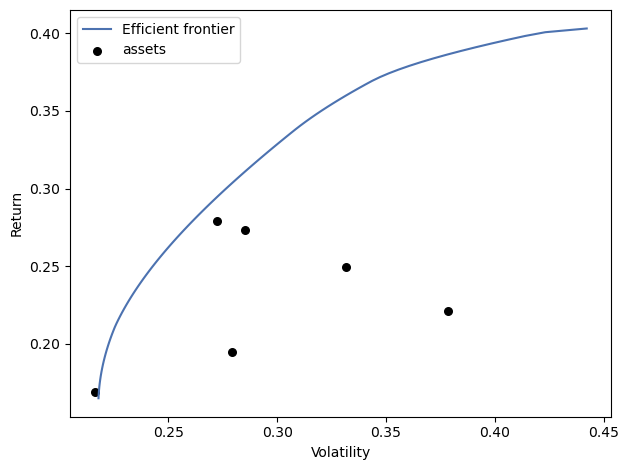

In [7]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

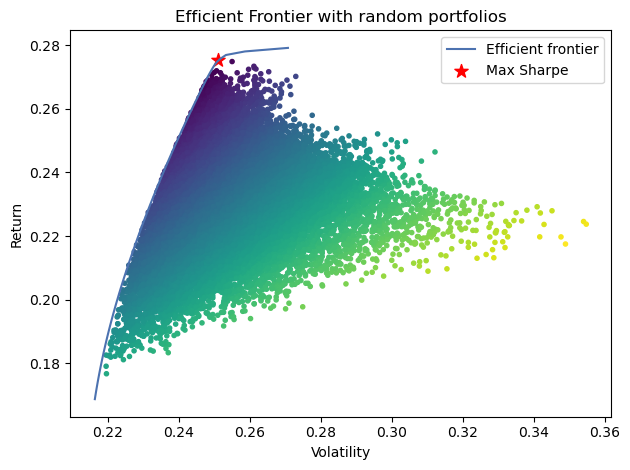

In [8]:
import copy 
ef = EfficientFrontier(mu, S)
# ef.add_objective(objective_functions.L2_reg, gamma=0.1)
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [9]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


# Calculate expected returns and covariance matrix
mu = mean_historical_return(portfolio_data)
S = CovarianceShrinkage(portfolio_data).ledoit_wolf()

# Create an EfficientFrontier instance
ef = EfficientFrontier(mu, S)

# Specify the target expected return
target_return = 30  # Replace with your desired target return

# Optimize for minimum risk for the given target return
weights_2 = ef.efficient_risk(target_return)

# Display the optimized portfolio weights
print(weights_2)

OrderedDict([(('Adj Close', 'AAPL'), 1.382576213e-07), (('Adj Close', 'AMZN'), 3.1025746e-09), (('Adj Close', 'GOOG'), 5.079886e-10), (('Adj Close', 'META'), 1.2375186e-09), (('Adj Close', 'MSFT'), 0.999999856427244), (('Adj Close', 'NDX'), 4.669197e-10)])


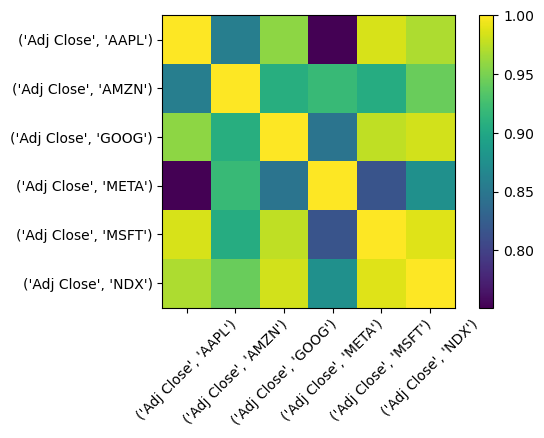

In [10]:
from pypfopt.plotting import plot_covariance
# Calculate covariance matrix S using df
S = portfolio_data.cov()

# Define tickers (labels) for the assets
tickers = portfolio_data.columns

# Plot the covariance matrix heatmap
plot_covariance(S, plot_correlation=True, show_tickers=True)

# Set custom tick labels
plt.xticks(np.arange(len(tickers)), tickers, rotation=45)
plt.yticks(np.arange(len(tickers)), tickers)

# Show the plot
plt.show()

In [11]:
# Log of percentage change
cov_matrix = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Adj Close                                                  
                    AAPL      AMZN      GOOG      META      MSFT       NDX
Adj Close AAPL  0.000323  0.000200  0.000187  0.000223  0.000202  0.000199
          AMZN  0.000200  0.000434  0.000235  0.000286  0.000220  0.000210
          GOOG  0.000187  0.000235  0.000307  0.000266  0.000211  0.000193
          META  0.000223  0.000286  0.000266  0.000580  0.000227  0.000229
          MSFT  0.000202  0.000220  0.000211  0.000227  0.000294  0.000200
          NDX   0.000199  0.000210  0.000193  0.000229  0.000200  0.000187

In [12]:
corr_matrix = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix


Adj Close                                                  
                    AAPL      AMZN      GOOG      META      MSFT       NDX
Adj Close AAPL  1.000000  0.534769  0.594690  0.514315  0.656138  0.810369
          AMZN  0.534769  1.000000  0.642166  0.570681  0.615144  0.738414
          GOOG  0.594690  0.642166  1.000000  0.628806  0.703514  0.804114
          META  0.514315  0.570681  0.628806  1.000000  0.549472  0.695245
          MSFT  0.656138  0.615144  0.703514  0.549472  1.000000  0.851964
          NDX   0.810369  0.738414  0.804114  0.695245  0.851964  1.000000

In [13]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'AMZN': 0.1, 'GOOG': 0.2, 'META': 0.2, 'MSFT': 0.3, 'NDX': 0.1}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0

In [14]:
# Yearly returns for individual companies
ind_er = portfolio_data.resample('Y').last().pct_change().mean()
ind_er

Adj Close  AAPL    0.307540
           AMZN    0.301580
           GOOG    0.205858
           META    0.298445
           MSFT    0.284271
           NDX     0.176255
dtype: float64

In [15]:
# Portfolio returns
w = [0.1, 0.1, 0.2, 0.2, 0.3, 0.1]
port_er = (w*ind_er).sum()
port_er

0.2646794652332118

In [16]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = portfolio_data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Adj Close  AAPL    0.284132
           AMZN    0.329399
           GOOG    0.277182
           META    0.380907
           MSFT    0.271032
           NDX     0.216004
dtype: float64

In [17]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
Adj Close AAPL  0.307540    0.284132
          AMZN  0.301580    0.329399
          GOOG  0.205858    0.277182
          META  0.298445    0.380907
          MSFT  0.284271    0.271032
          NDX   0.176255    0.216004

In [18]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(portfolio_data.columns)
num_portfolios = 25000

In [19]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [20]:
# Create an empty dictionary to store the data
data = {'Returns': p_ret, 'Volatility': p_vol}

# Iterate over the assets in your portfolio
for counter, symbol in enumerate(portfolio_data.columns.tolist()):
    # Create a key for each asset in the format: "<symbol> Weight"
    weight_key = f'{symbol} Weight'
    
    # Extract the weights for the current asset from p_weights
    weights_for_asset = [w[counter] for w in p_weights]
    
    # Add the weights data to the dictionary
    data[weight_key] = weights_for_asset

In [21]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,"('Adj Close', 'AAPL') Weight","('Adj Close', 'AMZN') Weight","('Adj Close', 'GOOG') Weight","('Adj Close', 'META') Weight","('Adj Close', 'MSFT') Weight","('Adj Close', 'NDX') Weight"
0,0.239485,0.232935,0.120699,0.044022,0.180107,0.042653,0.289985,0.322534
1,0.271579,0.261257,0.058731,0.267308,0.116281,0.261600,0.173176,0.122905
2,0.279904,0.259712,0.157889,0.123414,0.002173,0.320470,0.261364,0.134691
3,0.255462,0.249976,0.124215,0.336927,0.200239,0.088343,0.036583,0.213693
4,0.247465,0.242059,0.090509,0.233525,0.197183,0.087577,0.125187,0.266019


<Axes: xlabel='Volatility', ylabel='Returns'>

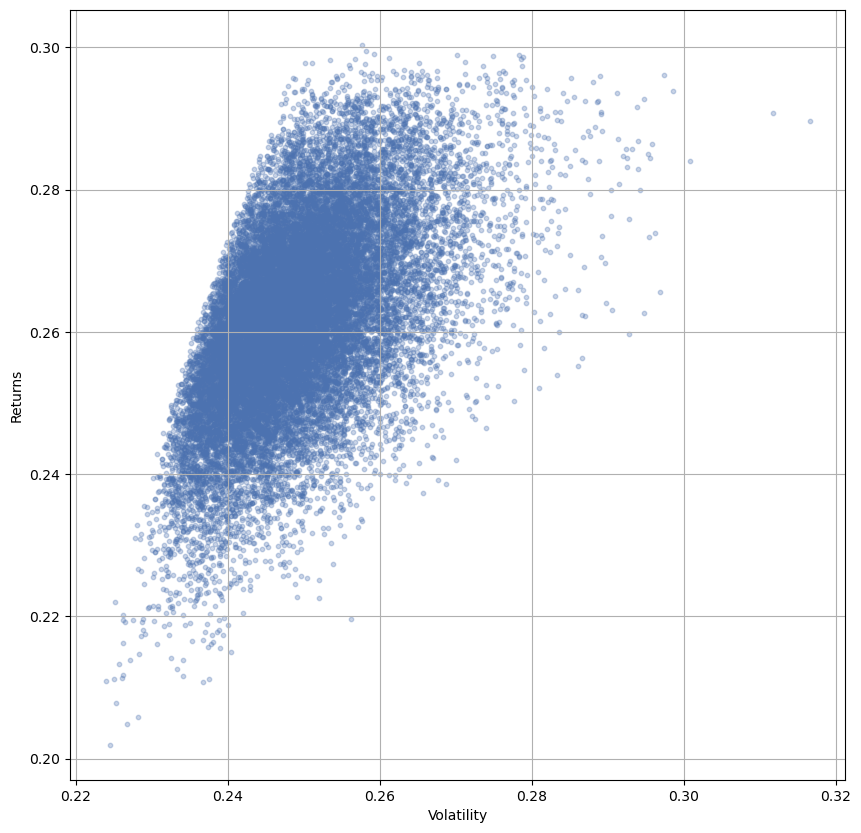

In [22]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [23]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                         0.210894
Volatility                      0.223908
('Adj Close', 'AAPL') Weight    0.035262
('Adj Close', 'AMZN') Weight    0.010751
('Adj Close', 'GOOG') Weight    0.034270
('Adj Close', 'META') Weight    0.007483
('Adj Close', 'MSFT') Weight    0.247498
('Adj Close', 'NDX') Weight     0.664736
Name: 7106, dtype: float64

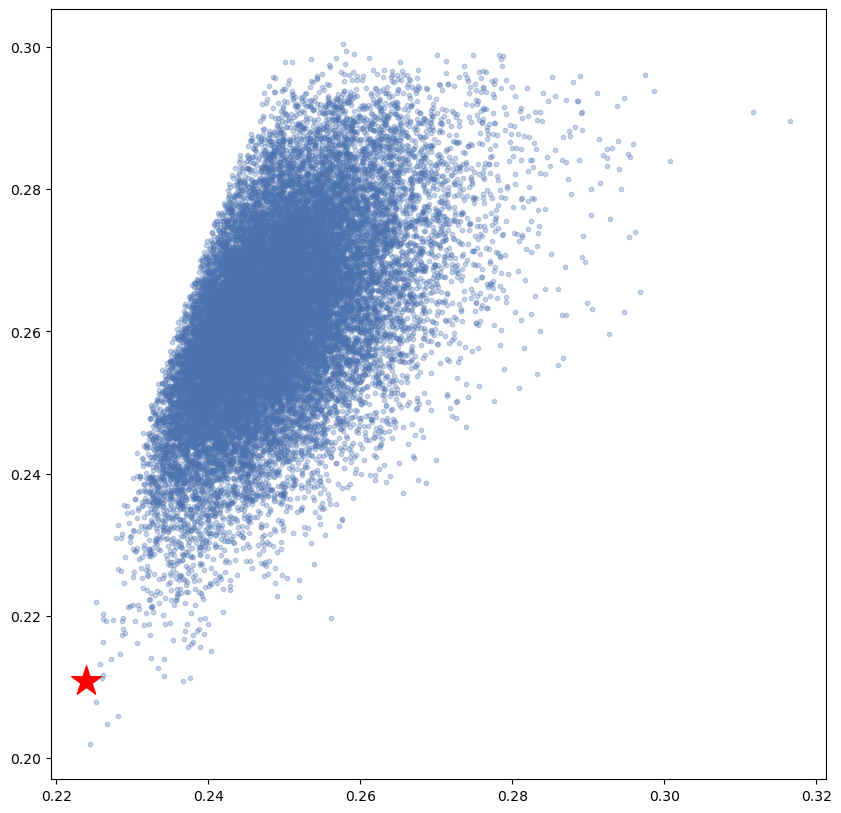

In [24]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [25]:
# Finding the optimal portfolio
rf = 0.04253 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                         0.297853
Volatility                      0.250151
('Adj Close', 'AAPL') Weight    0.416524
('Adj Close', 'AMZN') Weight    0.252190
('Adj Close', 'GOOG') Weight    0.002291
('Adj Close', 'META') Weight    0.023328
('Adj Close', 'MSFT') Weight    0.299865
('Adj Close', 'NDX') Weight     0.005802
Name: 18837, dtype: float64